In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,recall_score, f1_score

**Load datasets**

In [2]:
train_data=pd.read_csv('/content/train_LZdllcl.csv')
test_data=pd.read_csv('/content/test_2umaH9m.csv')

In [3]:
train_data.shape

(54808, 14)

In [4]:
test_data.shape

(23490, 13)

In [5]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Train Data

**Preprocessing**

In [8]:
train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


Text(0, 0.5, 'Classification')

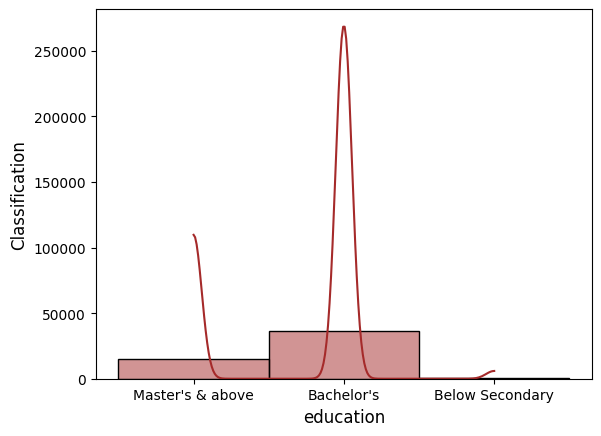

In [9]:
# Finding skewness of the data Education
sns.histplot(train_data['education'], kde=True, color='brown')
plt.xlabel('education', fontsize=12)
plt.ylabel('Classification', fontsize=12)

In [10]:
# Filling Missing Valuse with Mode
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])

Text(0, 0.5, 'Classification')

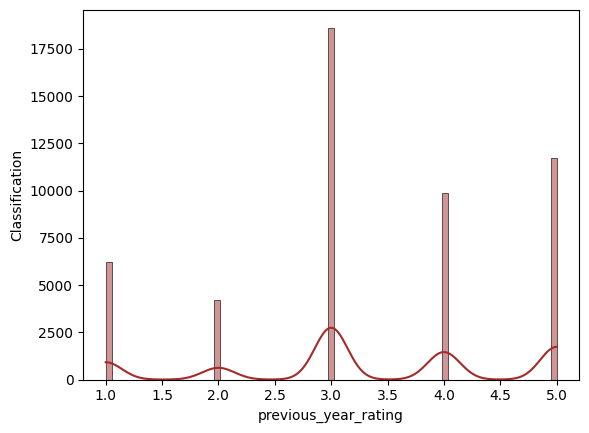

In [11]:
# Finding skewness of the data previous_year_rating
sns.histplot(train_data['previous_year_rating'], kde=True, color='brown')
plt.xlabel('previous_year_rating')
plt.ylabel('Classification')

In [12]:
# Filling Missing Valuse with median
train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [13]:
train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


**Correlation Heatmap**

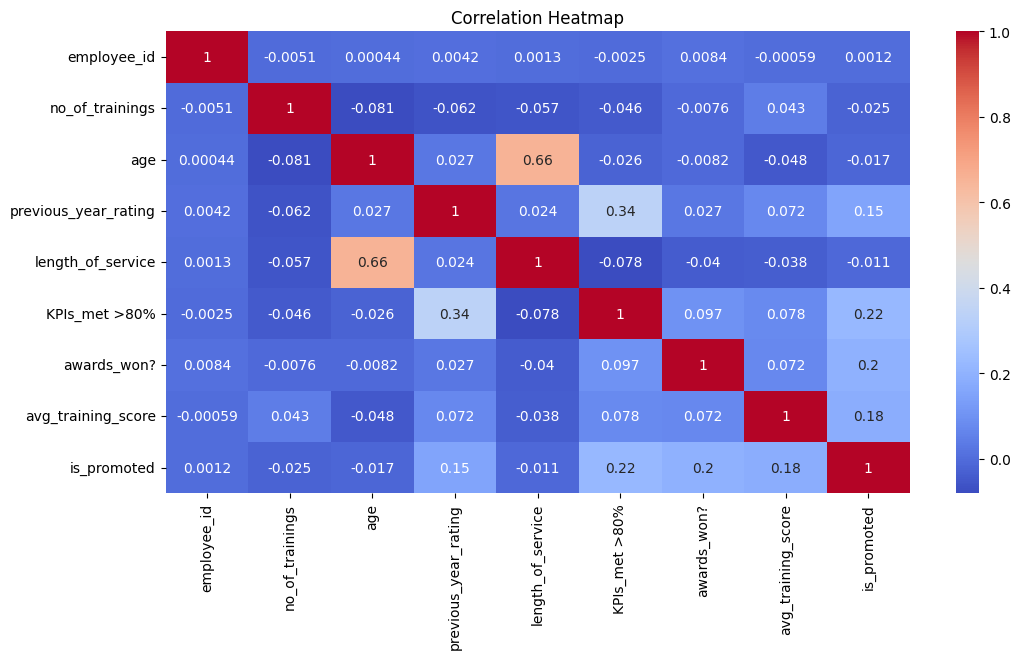

In [14]:
plt.figure(figsize=(12,6))
numeric_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Feature Selection**

In [15]:
X_train = train_data.drop(['employee_id','is_promoted'],axis=1)
y_train = train_data['is_promoted']

In [16]:
X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [17]:
y_train.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


**Label Encoding**

In [18]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=lr.fit_transform(y_train)

**One-hot encoding**

In [19]:
X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=['object', 'category']).columns.tolist(), dtype='int64')
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


**Standard Scaler**

In [20]:
# Scaling Feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

# Test Data

**Preprocessing**

In [21]:
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


Text(0, 0.5, 'Classification')

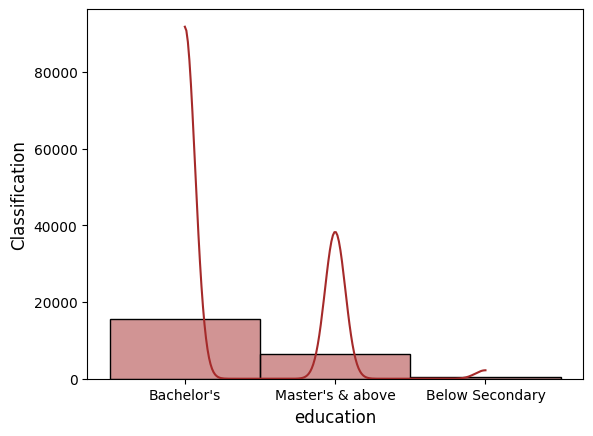

In [22]:
# Finding skewness of the data Education
sns.histplot(test_data['education'], kde=True, color='brown')
plt.xlabel('education', fontsize=12)
plt.ylabel('Classification', fontsize=12)

In [23]:
# Filling Missing Valuse with Mode
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])

Text(0, 0.5, 'Classification')

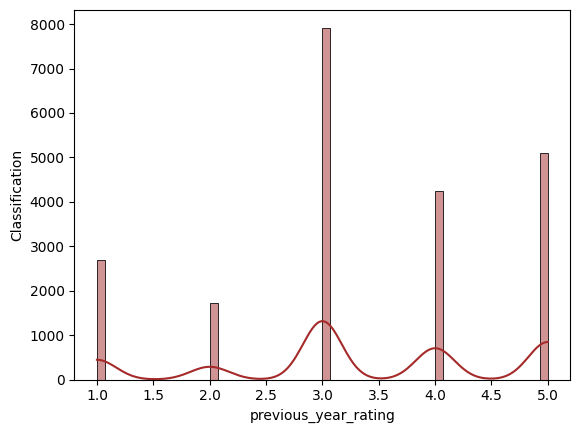

In [24]:
# Finding skewness of the data previous_year_rating
sns.histplot(test_data['previous_year_rating'], kde=True, color='brown')
plt.xlabel('previous_year_rating')
plt.ylabel('Classification')

In [25]:
# Filling Missing Valuse with median
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median())

In [26]:
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


**Feature Selection**

In [27]:
X_test = test_data.drop(['employee_id'],axis=1)

In [28]:
X_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


**One-hot encoding**

In [29]:
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=['object', 'category']).columns.tolist(), dtype='int64')
X_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,...,0,0,1,0,0,0,1,0,0,1


**Standard Scaler**

In [30]:
# Scaling Feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)

# Splitting Dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#  Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_data,y_train_data)
y_pred=lr.predict(X_test_data)

In [33]:
print(confusion_matrix(y_test_data,y_pred))
print(classification_report(y_test_data,y_pred))
print('Accuracy:', accuracy_score(y_test_data, y_pred))

[[9989   65]
 [ 672  236]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.78      0.26      0.39       908

    accuracy                           0.93     10962
   macro avg       0.86      0.63      0.68     10962
weighted avg       0.92      0.93      0.92     10962

Accuracy: 0.9327677431125707


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_data,y_train_data)
y_pred_nb=nb.predict(X_test_data)

In [35]:
print(confusion_matrix(y_test_data,y_pred_nb))
print(classification_report(y_test_data,y_pred_nb))
print('Accuracy:', accuracy_score(y_test_data, y_pred_nb))

[[1869 8185]
 [  72  836]]
              precision    recall  f1-score   support

           0       0.96      0.19      0.31     10054
           1       0.09      0.92      0.17       908

    accuracy                           0.25     10962
   macro avg       0.53      0.55      0.24     10962
weighted avg       0.89      0.25      0.30     10962

Accuracy: 0.24676153986498814


# Support Vector Machine [SVM]

In [36]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_data,y_train_data)
y_pred_svm=svm.predict(X_test_data)

In [37]:
print(confusion_matrix(y_test_data,y_pred_svm))
print(classification_report(y_test_data,y_pred_svm))
print('Accuracy:', accuracy_score(y_test_data, y_pred_svm))

[[10045     9]
 [  767   141]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.94      0.16      0.27       908

    accuracy                           0.93     10962
   macro avg       0.93      0.58      0.61     10962
weighted avg       0.93      0.93      0.91     10962

Accuracy: 0.9292099981755154


# K-Nearest Neighbors [KNN]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_data,y_train_data)
y_pred_knn=knn.predict(X_test_data)

In [39]:
print(confusion_matrix(y_test_data,y_pred_knn))
print(classification_report(y_test_data,y_pred_knn))
print('Accuracy:', accuracy_score(y_test_data, y_pred_knn))

[[9932  122]
 [ 810   98]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10054
           1       0.45      0.11      0.17       908

    accuracy                           0.91     10962
   macro avg       0.69      0.55      0.56     10962
weighted avg       0.88      0.91      0.89     10962

Accuracy: 0.9149790184272943


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_data,y_train_data)
y_pred_dt=dt.predict(X_test_data)

In [41]:
print(confusion_matrix(y_test_data,y_pred_dt))
print(classification_report(y_test_data,y_pred_dt))
print('Accuracy:', accuracy_score(y_test_data, y_pred_dt))

[[9423  631]
 [ 494  414]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.40      0.46      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962

Accuracy: 0.8973727422003284


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_data,y_train_data)
y_pred_rf=rf.predict(X_test_data)

In [43]:
print(confusion_matrix(y_test_data,y_pred_rf))
print(classification_report(y_test_data,y_pred_rf))
print('Accuracy:', accuracy_score(y_test_data, y_pred_rf))

[[9996   58]
 [ 648  260]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.82      0.29      0.42       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962

Accuracy: 0.9355956942163839


**Random Forest classification model gives best result**

In [44]:
print('Logistic Regression:', accuracy_score(y_test_data, y_pred))
print('Naive Bayes:', accuracy_score(y_test_data, y_pred_nb))
print('SVM:', accuracy_score(y_test_data, y_pred_svm))
print('KNN:', accuracy_score(y_test_data, y_pred_knn))
print('Decision Tree:', accuracy_score(y_test_data, y_pred_dt))
print('Random Forest:', accuracy_score(y_test_data, y_pred_rf))

Logistic Regression: 0.9327677431125707
Naive Bayes: 0.24676153986498814
SVM: 0.9292099981755154
KNN: 0.9149790184272943
Decision Tree: 0.8973727422003284
Random Forest: 0.9355956942163839


**submission file Uploading**


In [45]:
submission = pd.read_csv("/content/sample_submission_M0L0uXE.csv")
print(submission.head())

   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0


In [46]:
y_pred_rf = rf.predict(X_test)

submission['is_promoted'] = y_pred_rf
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [47]:
# Define the correct file path
submission_file_path = "/content/sample_submission_M0L0uXE.csv"
submission.to_csv(submission_file_path, index=False)

In [48]:
# Load and check the saved file
submission = pd.read_csv(submission_file_path)
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
